In [ ]:
!pip install imageai

In [23]:
import os
from pathlib import Path
import shutil

from PIL import Image

from imageai.Detection.Custom import DetectionModelTrainer, CustomObjectDetection

In [24]:
PATH_TO_IMAGES = '/kaggle/input/chess-piece-dectection/images/'
PATH_TO_ANNOTS = '/kaggle/input/chess-piece-dectection/annotations/'

In [25]:
images_paths = sorted([i for i in Path(PATH_TO_IMAGES).glob('*.png')])
annots_paths = sorted([i for i in Path(PATH_TO_ANNOTS).glob('*.xml')])

In [26]:
os.makedirs('yolov3_model/data/train/images', exist_ok=True)
os.makedirs('yolov3_model/data/train/annotations', exist_ok=True)

os.makedirs('yolov3_model/data/validation/images', exist_ok=True)
os.makedirs('yolov3_model/data/validation/annotations', exist_ok=True)

os.makedirs('yolov3_model/data/test/images', exist_ok=True)
os.makedirs('yolov3_model/data/test/annotations', exist_ok=True)

In [27]:
n_images = len(images_paths)
n_splits = n_images // 10

In [28]:
for i, (annotation_path, image_path) in enumerate(zip(annots_paths, images_paths)):
    
    if i < n_splits:
        
        shutil.copy(image_path, 'yolov3_model/data/test/images/' + image_path.name)
        shutil.copy(annotation_path, 'yolov3_model/data/test/annotations/' + annotation_path.name)
        
    elif n_splits <= i < n_splits + 5:
        
        shutil.copy(image_path, 'yolov3_model/data/validation/images/' + image_path.name)
        shutil.copy(annotation_path, 'yolov3_model/data/validation/annotations/' + annotation_path.name)
    
    else:
        
        shutil.copy(image_path, 'yolov3_model/data/train/images/' + image_path.name)
        shutil.copy(annotation_path, 'yolov3_model/data/train/annotations/' + annotation_path.name)

In [29]:
model_path = os.listdir('./yolov3_model/data/models')[-1]
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory='./yolov3_model/data/')
trainer.setTrainConfig(object_names_array=["black-king", "black-queen", "black-rook", "black-knight", 
                                           "black-bishop", "black-pawn", 
                                           "white-king", "white-queen", "white-rook", "white-knight", 
                                           "white-bishop", "white-pawn"], 
                       batch_size=8, 
                       num_experiments=30
                      )

trainer.trainModel()

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.82
Anchor Boxes generated.
Detection configuration saved in  ./yolov3_model/data/json/detection_config.json
Evaluating over 5 samples taken from ./yolov3_model/data/validation
Training over 68 samples  given at ./yolov3_model/data/train
Training on: 	['black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']
Training with Batch Size:  8
Number of Training Samples:  68
Number of Validation Samples:  5
Number of Experiments:  30
Pre-trained Model not provided. Transfer learning not in use.
Training will start with 3 warmup experiments
Epoch 1/33
72/72 [==============================] - 46s 616ms/step - loss: 641.3558 - yolo_layer_9_loss: 96.1227 - yolo_layer_10_loss: 175.6772 - yolo_layer_11_loss: 357.9827 - val_loss: 174.7014 - val_yolo_layer_9_loss: 19.8436 - val_yolo_layer_10_l

In [38]:
model_path = sorted(list(Path('./yolov3_model/data/models').iterdir()))[-1]
json_path = 'yolov3_model/data/json/detection_config.json'
metrics = trainer.evaluateModel(model_path=model_path,
                                json_path=json_path,
                                iou_threshold=0.2,
                                object_threshold=0.3,
                                nms_threshold=0.5)

Starting Model evaluation....
Evaluating over 5 samples taken from ./yolov3_model/data/validation
Training over 68 samples  given at ./yolov3_model/data/train
Model File:  yolov3_model/data/models/detection_model-ex-033--loss-0039.751.h5 

Evaluation samples:  5
Using IoU:  0.2
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
black-bishop: 0.0500
black-king: 0.0000
black-knight: 0.0000
black-pawn: 0.0000
black-queen: 0.0000
black-rook: 0.0000
white-bishop: 0.0000
white-king: 0.0000
white-knight: 0.0000
white-pawn: 0.0000
white-queen: 0.0000
white-rook: 0.0000
mAP: 0.0042


In [41]:
detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(model_path)
detector.setJsonPath(json_path)
detector.loadModel()

detections = detector.detectObjectsFromImage(minimum_percentage_probability=50, 
                                             input_image="yolov3_model/data/validation/images/chess16.png", 
                                             output_image_path="detected.png")

for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

black-bishop  :  51.70968770980835  :  [312, 49, 349, 78]
black-king  :  53.9669394493103  :  [312, 49, 349, 78]
black-knight  :  61.54481768608093  :  [312, 49, 349, 78]
black-pawn  :  64.36610221862793  :  [312, 49, 349, 78]
black-queen  :  60.02858281135559  :  [312, 49, 349, 78]
black-rook  :  58.12424421310425  :  [312, 49, 349, 78]
white-king  :  50.8404016494751  :  [312, 49, 349, 78]
white-knight  :  66.06431603431702  :  [312, 49, 349, 78]
white-pawn  :  63.4663462638855  :  [312, 49, 349, 78]
white-rook  :  55.658286809921265  :  [312, 49, 349, 78]
black-bishop  :  58.47628116607666  :  [110, 74, 150, 107]
black-pawn  :  59.05621647834778  :  [110, 74, 150, 107]
black-queen  :  60.90511679649353  :  [110, 74, 150, 107]
white-bishop  :  58.81021022796631  :  [110, 74, 150, 107]
white-king  :  62.70778775215149  :  [110, 74, 150, 107]
white-knight  :  74.18630123138428  :  [110, 74, 150, 107]
white-pawn  :  60.659658908843994  :  [110, 74, 150, 107]
white-queen  :  78.192830085

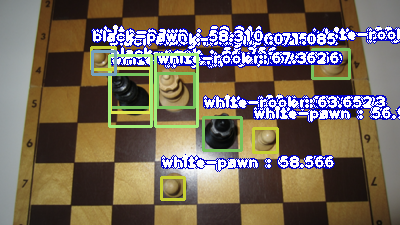

In [42]:
Image.open('detected.png')